<a href="https://colab.research.google.com/github/Chaitanyadasari/samVikas/blob/main/samvikas_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff

In [69]:
df = pd.read_csv('samvikas_data.csv')

In [70]:
df

,Name,Months,Height,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Remarks
0,A,3,4,M,988885565,1,NaN,NaN,NaN,NaN,NaN,AP,NaN
1,B,4,2,M,988885565,1,1.0,NaN,NaN,NaN,NaN,Gujarath,NaN
2,C,5,2,F,988885565,1,NaN,NaN,NaN,NaN,NaN,AP,NaN
3,D,6,3,F,988885565,1,1.0,1.0,NaN,NaN,NaN,Telangana,NaN
4,E,7,3,F,988885565,1,1.0,NaN,NaN,NaN,NaN,Orrisa,NaN
5,F,3,4,M,988885565,1,NaN,NaN,NaN,NaN,NaN,Bihar,NaN
6,G,5,5,M,988885565,1,1.0,1.0,NaN,NaN,NaN,Maharastra,NaN
7,H,6,2,M,988885565,1,1.0,NaN,NaN,NaN,NaN,West Bengal,NaN
8,I,12,1,F,988885565,1,1.0,1.0,1.0,NaN,NaN,Bihar,NaN
9,J,15,5,M,988885565,1,1.0,1.0,1.0,NaN,NaN,SD,NaN


In [62]:
print(df.head())

  Name  Months  Height Gender  ...  Feature 5  Feature 6   Location  Remarks
0    A       3       4      M  ...        NaN        NaN         AP      NaN
1    B       4       2     M   ...        NaN        NaN   Gujarath      NaN
2    C       5       2      F  ...        NaN        NaN         AP      NaN
3    D       6       3      F  ...        NaN        NaN  Telangana      NaN
4    E       7       3      F  ...        NaN        NaN     Orrisa      NaN

[5 rows x 13 columns]


In [63]:
df.shape

(21, 13)

In [72]:
df = df.drop(df.index[1])

In [73]:
df1 = df[df.columns.drop(['Name', 'Height','Contact','Location'])]

In [74]:
df2 = df1.fillna(0)
df2
df2['Gender'].astype(str)

0     M
2     F
3     F
4     F
5     M
6     M
7     M
8     F
9     M
10    M
11    F
12    F
13    M
14    F
15    M
16    F
17    F
18    M
19    F
20    M
Name: Gender, dtype: object

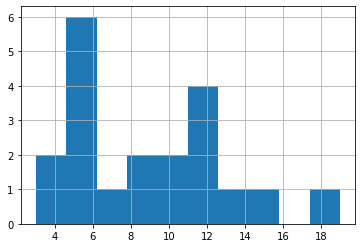

In [75]:
#visualization 
df2['Months'].hist()

In [76]:
#visualization 

df2.loc[df['Gender'] == 'M', 'Gender'] = 1
df2.loc[df['Gender'] == 'F', 'Gender'] = 0
df2

,Months,Gender,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Remarks
0,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0,1,1.0,1.0,0.0,0.0,0.0,0.0
4,7,0,1,1.0,0.0,0.0,0.0,0.0,0.0
5,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0
6,5,1,1,1.0,1.0,0.0,0.0,0.0,0.0
7,6,1,1,1.0,0.0,0.0,0.0,0.0,0.0
8,12,0,1,1.0,1.0,1.0,0.0,0.0,0.0
9,15,1,1,1.0,1.0,1.0,0.0,0.0,0.0
10,8,1,1,1.0,1.0,0.0,0.0,0.0,0.0


In [77]:
df2.dtypes

Months         int64
Gender        object
Feature 1      int64
Feature 2    float64
Feature 3    float64
Feature 4    float64
Feature 5    float64
Feature 6    float64
Remarks      float64
dtype: object

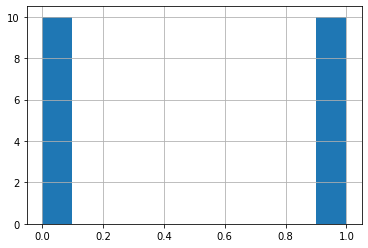

In [78]:
#visualization 
df2['Gender'].hist()

In [85]:
df2['Remarks']= (df2['Feature 1'] + df2['Feature 2']+ df2['Feature 3'] + df2['Feature 4']+ df2['Feature 5'] + df2['Feature 6'])

In [86]:
for index, row in df2.iterrows():
  print(row['Remarks'])
  

1.0
1.0
3.0
2.0
1.0
3.0
2.0
4.0
4.0
3.0
2.0
4.0
3.0
4.0
3.0
2.0
4.0
2.0
3.0
6.0


In [87]:
df2

,Months,Gender,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Remarks
0,3,1,1,0.0,0.0,0.0,0.0,0.0,1.0
2,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0
3,6,0,1,1.0,1.0,0.0,0.0,0.0,3.0
4,7,0,1,1.0,0.0,0.0,0.0,0.0,2.0
5,3,1,1,0.0,0.0,0.0,0.0,0.0,1.0
6,5,1,1,1.0,1.0,0.0,0.0,0.0,3.0
7,6,1,1,1.0,0.0,0.0,0.0,0.0,2.0
8,12,0,1,1.0,1.0,1.0,0.0,0.0,4.0
9,15,1,1,1.0,1.0,1.0,0.0,0.0,4.0
10,8,1,1,1.0,1.0,0.0,0.0,0.0,3.0


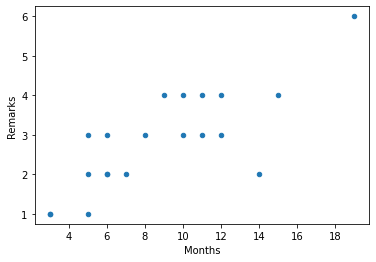

In [88]:
ax1 = df2.plot.scatter(x='Months',y='Remarks')
ax1